# Import Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Read Data

In [7]:
movies = pd.read_csv("movies")
ratings = pd.read_csv("ratings")
links = pd.read_csv("links")
gtags = pd.read_csv("gtags")
tags = pd.read_csv("tags")

# Merging Dataframes

In [8]:
merged_1 = pd.merge(movies,ratings,on='movieId')
merged_2 = pd.merge(merged_1,links,on='movieId')
merged_2.head() #25.000.095

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,114709,862.0


In [5]:
merged_1_1 = pd.merge(gscores, gtags, on='tagId')
merged__2_1 = pd.merge(merged_1_1,tags,on='movieId') #Merging the TAGS dataframe is failing, maybe because of its size
merged__2_1.head()
#merged_1_1.head() #15.584.448

,movieId,tagId,relevance,tag_x,userId,tag_y,timestamp
0,1,1,0.02875,007,791,Owned,1515175493
1,1,1,0.02875,007,1048,imdb top 250,1172144394
2,1,1,0.02875,007,1361,Pixar,1216146311
3,1,1,0.02875,007,3164,Pixar,1223304727
4,1,1,0.02875,007,3164,time travel,1223304729


In [6]:
df = pd.merge(merged__2_1,merged_2,how='inner', on='movieId')
df.head()

,movieId,tagId,relevance,tag_x,userId_x,tag_y,timestamp_x,title,genres,userId_y,rating,timestamp_y,imdbId,tmdbId
0,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,114709,862.0
1,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,114709,862.0
2,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,114709,862.0
3,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,114709,862.0
4,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,114709,862.0


# EDA

## Genres Rating

In [7]:
genres_rating = pd.DataFrame(df.groupby('genres')['rating'].mean().sort_values(ascending=False))
genres_rating['num of ratings'] = df.groupby('genres')['rating'].count().sort_values(ascending=False)

### Top Rated Movie with more than 100 reviews

In [8]:
genres_rating[genres_rating['num of ratings'] > 100].head(10)

,rating,num of ratings
genres,,
Drama|Fantasy|Horror|Romance,5.000,13536
Adventure|Comedy|Musical,5.000,2256
Adventure|Animation|Sci-Fi,4.750,15792
Animation|Drama|Romance,4.625,4512
Adventure|Animation|Fantasy|Romance,4.625,153408
Adventure|Animation|Drama|Fantasy|Sci-Fi,4.600,90240
Animation|Horror|Mystery|Thriller,4.500,9024
Adventure|Drama|Fantasy,4.500,11280
Drama|Fantasy|Romance|Thriller,4.500,16920


### Most Rated Movie

In [19]:
movie_ratings.sort_values('num of ratings',ascending=False).head(50)

,title,rating,num of ratings
202,Star Wars: Episode IV - A New Hope (1977),4.144068,9849696
117,Pulp Fiction (1994),4.275862,5822736
77,"Shawshank Redemption, The (1994)",4.400000,4404840
152,Inception (2010),4.241379,4219848
105,Fight Club (1999),4.320513,3739320
223,Forrest Gump (1994),4.105263,3536280
175,"Silence of the Lambs, The (1991)",4.182692,3284736
218,"Matrix, The (1999)",4.113208,3228336
388,Eternal Sunshine of the Spotless Mind (2004),3.964286,2905728
107,Star Wars: Episode V - The Empire Strikes Back...,4.318182,2283072


## Movie Titles Rating

In [9]:
movie_ratings = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
movie_ratings.head()

,rating
title,
Abbott and Costello Meet Frankenstein (1948),5.0
Poltergeist (1982),5.0
"Court Jester, The (1956)",5.0
In the Heat of the Night (1967),5.0
5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007),5.0


In [10]:
movie_ratings['num of ratings'] = df.groupby('title')['rating'].count().sort_values(ascending=False)
movie_ratings = movie_ratings.reset_index() #Reset the index column
movie_ratings.head()

,title,rating,num of ratings
0,Abbott and Costello Meet Frankenstein (1948),5.0,1128
1,Poltergeist (1982),5.0,10152
2,"Court Jester, The (1956)",5.0,2256
3,In the Heat of the Night (1967),5.0,5640
4,5 Centimeters per Second (Byôsoku 5 senchimêto...,5.0,1128


[Text(0.5, 1.0, 'Clustered')]

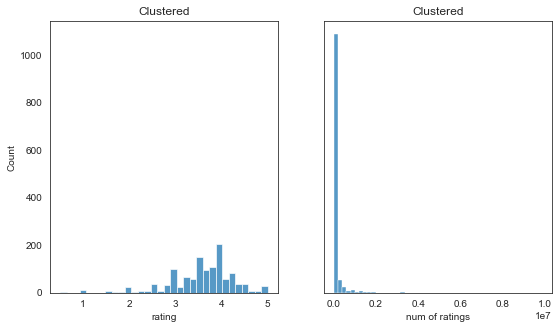

In [11]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey=True)
sns.histplot(data = movie_ratings, x ='rating', ax = axs[0]).set(title='Clustered')
sns.histplot(data = movie_ratings, x ='num of ratings', ax = axs[1],bins = 50).set(title='Clustered')

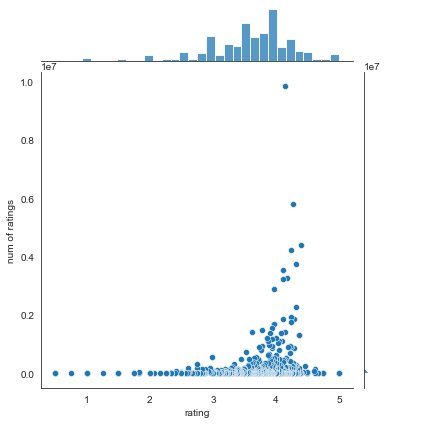

In [12]:
sns.jointplot(x='rating', y='num of ratings', data=movie_ratings)

# Recommend Similar Movies

In [13]:
df.head()

,movieId,tagId,relevance,tag_x,userId_x,tag_y,timestamp_x,title,genres,userId_y,rating,timestamp_y,imdbId,tmdbId
0,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,114709,862.0
1,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,114709,862.0
2,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,114709,862.0
3,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,114709,862.0
4,1,1,0.02875,007,791,Owned,1515175493,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,114709,862.0


In [14]:
df['userId_y'].nunique()

119

In [15]:
movierec = df.pivot_table(index='userId_y',columns='title', values='rating')
movierec.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),1408 (2007),17 Again (2009),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),...,X-Men Origins: Wolverine (2009),X2: X-Men United (2003),Yes Man (2008),Yojimbo (1961),You Only Live Twice (1967),You've Got Mail (1998),Young Frankenstein (1974),Young Sherlock Holmes (1985),Zodiac (2007),Zombieland (2009)
userId_y,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,3.5,NaN,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Most Rated Movie

In [17]:
movie_ratings.head()

,title,rating,num of ratings
0,Abbott and Costello Meet Frankenstein (1948),5.0,1128
1,Poltergeist (1982),5.0,10152
2,"Court Jester, The (1956)",5.0,2256
3,In the Heat of the Night (1967),5.0,5640
4,5 Centimeters per Second (Byôsoku 5 senchimêto...,5.0,1128


In [20]:
movie_ratings.sort_values('num of ratings',ascending=False).head(10)

,title,rating,num of ratings
202,Star Wars: Episode IV - A New Hope (1977),4.144068,9849696
117,Pulp Fiction (1994),4.275862,5822736
77,"Shawshank Redemption, The (1994)",4.400000,4404840
152,Inception (2010),4.241379,4219848
105,Fight Club (1999),4.320513,3739320
223,Forrest Gump (1994),4.105263,3536280
175,"Silence of the Lambs, The (1991)",4.182692,3284736
218,"Matrix, The (1999)",4.113208,3228336
388,Eternal Sunshine of the Spotless Mind (2004),3.964286,2905728
107,Star Wars: Episode V - The Empire Strikes Back...,4.318182,2283072


In [23]:
starwars_user_ratings = movierec['Star Wars: Episode IV - A New Hope (1977)']
pulp_finction_user_rating = movierec['Pulp Fiction (1994)']
starwars_user_ratings.head()

userId_y
1    NaN
2    5.0
3    4.0
4    3.5
5    5.0
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

### Find correlation with the focus movies

In [24]:
similar_to_star_wars = movierec.corrwith(starwars_user_ratings)
similar_to_pulp_finction =movierec.corrwith(pulp_finction_user_rating)

/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


### Clean Correlation matrix

In [41]:
corr_star_wars = pd.DataFrame(similar_to_star_wars, columns=['Correlation'])
corr_star_wars.dropna(inplace=True)

corr_pulp_finction = pd.DataFrame(similar_to_pulp_finction, columns=['Correlation'])
corr_pulp_finction.dropna(inplace=True)

#corr_star_wars.head()
corr_pulp_finction.head()

,Correlation
title,
(500) Days of Summer (2009),0.000000
10 Things I Hate About You (1999),0.484123
101 Dalmatians (1996),-0.960769
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.000000
12 Angry Men (1957),0.397287


In [33]:
movie_ratings.head()

,title,rating,num of ratings
0,Abbott and Costello Meet Frankenstein (1948),5.0,1128
1,Poltergeist (1982),5.0,10152
2,"Court Jester, The (1956)",5.0,2256
3,In the Heat of the Night (1967),5.0,5640
4,5 Centimeters per Second (Byôsoku 5 senchimêto...,5.0,1128


## Star Wars Movies Suggestion

In [42]:
corr_star_wars = pd.merge(corr_star_wars,movie_ratings, on='title')
corr_star_wars = corr_star_wars.drop(['rating'],axis=1)

In [52]:
star_wars_suggestions = corr_star_wars[corr_star_wars['num of ratings']>100].sort_values('Correlation', ascending=False).head(50)
star_wars_suggestions

,title,Correlation,num of ratings
189,Commando (1985),1.0,2256
298,Ghost World (2001),1.0,10152
686,"Sweet Hereafter, The (1997)",1.0,22560
314,"Good bye, Lenin! (2003)",1.0,27072
343,Head-On (Gegen die Wand) (2004),1.0,23688
345,Heavenly Creatures (1994),1.0,3384
63,Antwone Fisher (2002),1.0,9024
67,"Apostle, The (1997)",1.0,2256
69,"Aristocrats, The (2005)",1.0,2256
188,Come and See (Idi i smotri) (1985),1.0,2256


## Pulp Finction Movies Suggestion

In [53]:
corr_pulp_finction = pd.merge(corr_pulp_finction,movie_ratings, on='title')
corr_pulp_finction = corr_pulp_finction.drop(['rating'],axis=1)

In [54]:
pulp_finction_suggestions = corr_pulp_finction[corr_pulp_finction['num of ratings']>100].sort_values('Correlation', ascending=False).head(50)
pulp_finction_suggestions

,title,Correlation,num of ratings
399,"Last Emperor, The (1987)",1.0,5640
570,Rush Hour (1998),1.0,55272
184,Come and See (Idi i smotri) (1985),1.0,2256
342,How to Train Your Dragon (2010),1.0,165816
170,City Slickers (1991),1.0,3384
162,"Chorus, The (Choristes, Les) (2004)",1.0,31584
153,"Cat Returns, The (Neko no ongaeshi) (2002)",1.0,2256
141,"Bucket List, The (2007)",1.0,2256
569,Runaway Jury (2003),1.0,3384
321,Hancock (2008),1.0,42864
